<h1 style ="font-size: 3rem;color: Gray;"> Educational Attainment differences between boys and girls in uk regions</h1>

# Import libraries and tools

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_samples
from sklearn.neighbors import KNeighborsClassifier
import chardet
import seaborn as sns

Set a larger plot

In [53]:
sns.set(rc={'figure.figsize':(9,9)})

# Investigate a data file

Identify datasets in the folder

In [54]:
! ls 'data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data'

SFR01_2016_UD_LA_1.csv	      SFR01_2016_UD_national_2.csv
SFR01_2016_UD_LA_2.csv	      SFR01_2016_UD_parliamentary_constituency.csv
SFR01_2016_UD_metadata.txt    SFR01_2016_UD_residency.csv
SFR01_2016_UD_national_1.csv  SFR01_2016_UD_school_location.csv


Check file encoding

In [55]:
chardet.detect(open('data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv', 'rb').read())

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [56]:
! tail 'data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv'

Investigate a dataset's columns

In [57]:
list(pd.read_csv('data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv').columns)

['Country_code_9_digit',
 'Country_code',
 'Country_name',
 'Region_code_9_digit',
 'Region_code',
 'Region_name',
 'LA_code_9_digit',
 'LA_code',
 'LA_name',
 'Laden_all_15',
 'Laden_boys_15',
 'Laden_girls_15',
 'KS4_LEVEL2_all_15',
 'KS4_LEVEL2_boys_15',
 'KS4_LEVEL2_girls_15',
 'KS4_LEVEL2_EM_all_15',
 'KS4_LEVEL2_EM_boys_15',
 'KS4_LEVEL2_EM_girls_15',
 'KS4_LEVEL1_all_15',
 'KS4_LEVEL1_boys_15',
 'KS4_LEVEL1_girls_15',
 'KS4_LEVEL1_EM_all_15',
 'KS4_LEVEL1_EM_boys_15',
 'KS4_LEVEL1_EM_girls_15',
 'KS4_L2BASICS_all_15',
 'KS4_L2BASICS_boys_15',
 'KS4_L2BASICS_girls_15',
 'KS4_EBACC_E_all_15',
 'KS4_EBACC_E_boys_15',
 'KS4_EBACC_E_girls_15',
 'KS4_EBACC_all_15',
 'KS4_EBACC_boys_15',
 'KS4_EBACC_girls_15',
 'Laden_all_white_15',
 'Laden_boys_white_15',
 'Laden_girls_white_15',
 'KS4_LEVEL2_all_white_15',
 'KS4_LEVEL2_boys_white_15',
 'KS4_LEVEL2_girls_white_15',
 'KS4_LEVEL2_EM_all_white_15',
 'KS4_LEVEL2_EM_boys_white_15',
 'KS4_LEVEL2_EM_girls_white_15',
 'KS4_LEVEL1_all_white_15

identify the unique values in a relevant column of the dataset

In [58]:
pd.unique(pd.read_csv('data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv')['Region_name']).copy()

array([nan, 'North East', 'North West', 'Yorkshire and the Humber',
       'East Midlands', 'West Midlands', 'East', 'London', 'Inner London',
       'Outer London', 'South East', 'South West'], dtype=object)

Investigate the key statistical values of the dataset

In [59]:
pd.read_csv('data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv').describe()

,Country_code,LA_code,Laden_all_15,Laden_boys_15,Laden_girls_15,KS4_LEVEL2_all_15,KS4_LEVEL2_EM_all_15,KS4_LEVEL1_all_15,KS4_LEVEL1_boys_15,KS4_LEVEL1_girls_15,...,KS4_LEVEL2_EM_all_white_15,KS4_LEVEL1_all_white_15,KS4_LEVEL1_EM_all_white_15,KS4_L2BASICS_all_white_15,Laden_all_mixed_15,KS4_EBACC_E_all_mixed_15,Laden_all_English_15,Laden_all_otherthanEnglish_15,Laden_boys_otherthanEnglish_15,Laden_girls_otherthanEnglish_15
count,164.0,152.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,921.0,613.578947,10536.475610,5371.701220,5164.774390,7026.213415,6057.036585,9945.408537,4999.347561,4946.060976,...,4678.158537,7713.097561,7506.420732,4864.158537,448.073171,189.073171,8946.695122,1571.951220,800.841463,771.109756
std,0.0,278.512999,44851.100969,22874.549557,21976.722566,29854.171440,25749.405818,42322.313080,21281.869723,21040.611713,...,20297.192017,33480.585981,32587.932393,21107.585548,1877.155783,793.235864,38567.804853,6623.358409,3374.873823,3248.629338
min,921.0,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,921.0,334.750000,1962.000000,995.500000,966.750000,1267.750000,1096.250000,1857.750000,922.250000,935.500000,...,719.250000,1287.250000,1262.750000,749.750000,61.250000,24.750000,1473.750000,112.250000,58.500000,57.500000
50%,921.0,806.500000,2925.500000,1493.500000,1407.500000,1949.500000,1633.000000,2748.000000,1387.500000,1342.000000,...,1153.000000,1961.000000,1904.500000,1195.000000,130.000000,55.500000,2281.500000,335.000000,175.000000,161.500000
75%,921.0,872.250000,5267.250000,2683.000000,2568.750000,3411.000000,2935.750000,4937.500000,2505.250000,2448.750000,...,2688.750000,4459.250000,4308.000000,2804.000000,224.000000,94.000000,4946.500000,839.500000,426.750000,412.750000
max,921.0,938.000000,550786.000000,280920.000000,269866.000000,366152.000000,315773.000000,519661.000000,261310.000000,258351.000000,...,249261.000000,411446.000000,400466.000000,259232.000000,22414.000000,9358.000000,474183.000000,75693.000000,38562.000000,37131.000000


# Create dataset conntaining relevant data

Create a dataset containing only the relevant data fields required for the investigation

In [60]:
regional_df = pd.read_csv('data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv', thousands =',', usecols = ['Region_name','KS4_LEVEL2_girls_15','KS4_LEVEL2_boys_15']).copy()
regional_df.head(5)

,Region_name,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
0,NaN,171584,194568
1,North East,8231,9315
2,North West,23569,26868
3,Yorkshire and the Humber,16798,19341
4,East Midlands,14168,16566


# Check data and clean where necessary

In [61]:
regional_df['Region_name'].unique()

array([nan, 'North East', 'North West', 'Yorkshire and the Humber',
       'East Midlands', 'West Midlands', 'East', 'London', 'Inner London',
       'Outer London', 'South East', 'South West'], dtype=object)

Check for invalid data type in the columns 

In [62]:
regional_df['KS4_LEVEL2_boys_15'].unique()

array(['171584', '8231', '23569', '16798', '14168', '18512', '19741',
       '25322', '7838', '17484', '28495', '16748', '663', '715', '734',
       '501', '839', '306', '354', '478', '723', '1586', '302', '1030',
       '262', '1229', '569', '1058', '1168', '1034', '643', '1292', '830',
       '659', '555', '936', '797', '1098', '472', '750', '4007', '520',
       '330', '1346', '1233', '1613', '589', '878', '980', '1610', '1395',
       '906', '1374', '2321', '1180', '619', '1125', '510', '531', '2191',
       '2374', '747', '2284', '885', '183', '2487', '584', '2449', '2175',
       '3700', '934', '1055', '950', '1026', '933', '672', '2786', '599',
       '1826', '954', '593', '1885', '704', '612', '864', '1831', '609',
       '4768', '519', '4498', '2471', '2131', '0', '711', '565', '349',
       '505', '352', '581', '635', '808', '824', '606', '494', '645',
       '1411', '1100', '1010', '1141', '1079', '961', '1137', '658',
       '713', '973', '947', '530', '1131', '1201', '475'

In [63]:
regional_df[regional_df['KS4_LEVEL2_boys_15'] == 'x']

,Region_name,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
148,South West,x,x
160,South West,x,x


Remove rows 148 and 160 becuase they contain no relevant data and check the dataset has been updated

In [64]:
regional_df.drop([148,160], inplace = True)

In [65]:
regional_df.head(160)

,Region_name,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
0,NaN,171584,194568
1,North East,8231,9315
2,North West,23569,26868
3,Yorkshire and the Humber,16798,19341
4,East Midlands,14168,16566
...,...,...,...
156,South West,1643,1928
157,South West,581,755
158,South West,2280,2542
159,South West,731,926


Set the data type for the columns contianing data on boys and girls attainment to type integer for statistical computations

In [66]:
regional_df['KS4_LEVEL2_girls_15'] = regional_df['KS4_LEVEL2_girls_15'].astype(int)
regional_df['KS4_LEVEL2_boys_15'] = regional_df['KS4_LEVEL2_boys_15'].astype(int)

In [67]:
regional_df.dtypes

Region_name            object
KS4_LEVEL2_boys_15      int64
KS4_LEVEL2_girls_15     int64
dtype: object

In this investigation the inner and outer london regions will not be considered as seperate regions from london and the data held on these regions will be incorperated into the london region data

In [68]:
regional_df.replace(['Inner London'],['London'], inplace = True, regex = True)
regional_df.replace(['Outer London'], ['London'], inplace = True, regex = True)

Check for null or NaN values

In [69]:
regional_df[regional_df.isnull().any(axis=1)]

,Region_name,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
0,NaN,171584,194568


Change the current NaN value to unknown 

In [70]:
regional_df['Region_name'] = regional_df['Region_name'].fillna('Unknown')

# Classification of Unknown region using the K-Nearest Neighbour 

create a dataset which does not contain the row to build training data from to avoid mis-classification

In [71]:
grouped = regional_df[regional_df['Region_name']!= 'Unknown']
grouped.head()

,Region_name,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
1,North East,8231,9315
2,North West,23569,26868
3,Yorkshire and the Humber,16798,19341
4,East Midlands,14168,16566
5,West Midlands,18512,21088


Create training and target data for the classifier

In [72]:
training_df = grouped[['KS4_LEVEL2_boys_15', 'KS4_LEVEL2_girls_15']]
target_ss = grouped['Region_name']


# Find optimum for k using leave one out algorithm

create the leave one out function

In [73]:
def leave_one_out(training_df, target_ss, indx, k):
    classifier_KNN =KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'uniform')
    classifier_KNN.fit(training_df.drop(indx, axis='index'),target_ss.drop(indx))
    return classifier_KNN.predict([training_df.loc[indx]])[0]

Create leave one out function call to provide the range of k and help identify the optimum value of k

In [74]:
for k in range(2,9):
    print('{}\t{}'.format(k,
                          list([leave_one_out(training_df, 
                                              target_ss, 
                                              i, 
                                              k)
                                  for i in training_df.index] == target_ss).count(True)))

2	23
3	28
4	22
5	24
6	25
7	22
8	27


The highest correct identification rate for k is 28 which is at k = 3, next I create the test data using the data in the unknown regions columns

In [75]:
testData_df = pd.DataFrame({'KS4_LEVEL2_boys_15':[171584],
                            'KS4_LEVEL2_girls_15':[194568]})
testData_df.head()

,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
0,171584,194568


Create a result dataset to display results and then train and check classification of the unknown region with k ranging from 2 to 9 using the KNN classifier

In [76]:
result_df = testData_df.copy()

for k in range(2, 9):
    classifier_kNN = KNeighborsClassifier(n_neighbors= k, metric='euclidean', weights='distance')
    classifier_kNN.fit(training_df, target_ss)
    
    result_df['Region_name (k={})'.format(k)] = classifier_kNN.predict(testData_df)

result_df

,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15,Region_name (k=2),Region_name (k=3),Region_name (k=4),Region_name (k=5),Region_name (k=6),Region_name (k=7),Region_name (k=8)
0,171584,194568,South East,South East,South East,South East,London,London,London


The classifiaction indicates the region at k=3 to be South East so i will set the Region_name value to South East as k = 3 is the lowest error rate for the form of k.

In [77]:
regional_df.replace(['Unknown'], ['South East'], inplace = True)

In [78]:
regional_df.head()

,Region_name,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
0,South East,171584,194568
1,North East,8231,9315
2,North West,23569,26868
3,Yorkshire and the Humber,16798,19341
4,East Midlands,14168,16566


# Statistical Tests

Get an statistical description now unknown region has been incorperated into dataset

In [79]:
regional_df.describe()

,KS4_LEVEL2_boys_15,KS4_LEVEL2_girls_15
count,162.000000,162.000000
mean,3330.771605,3776.061728
std,14076.695020,15953.599607
min,0.000000,0.000000
25%,599.000000,689.250000
50%,920.500000,1016.000000
75%,1612.250000,1879.000000
max,171584.000000,194568.000000


Plot distribution of the data held on both boys and girls attainment over all regions

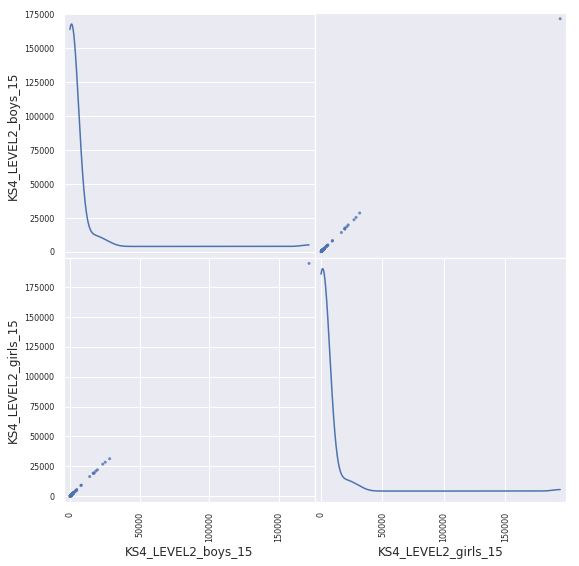

In [80]:
pd.plotting.scatter_matrix(regional_df[['KS4_LEVEL2_boys_15', 'KS4_LEVEL2_girls_15']], alpha = 0.8, figsize = (9,9), diagonal ='kde')
plt.show()

 The distributions are similar but the girls have an overal higher attainment at ks4 level 2, Next I Check the pearson r and p values to identify the coefficient correlation

next let find the regression

In [81]:
regression = scipy.stats.linregress(regional_df['KS4_LEVEL2_boys_15'],
                                    regional_df['KS4_LEVEL2_girls_15'])
m = regression[0]
c = regression[1]

print(f'm: {m}, c: {c}')

m: 1.1332976323332866, c: 1.3061546755775453


now Investigate the Spearmans r value

In [82]:
scipy.stats.spearmanr(regional_df['KS4_LEVEL2_boys_15'], regional_df['KS4_LEVEL2_girls_15'])

SpearmanrResult(correlation=0.9881532791262851, pvalue=3.6995944063963e-132)

The Spearman r value is close to 1 which indicates some correlation bewtween the two variables, the p value indicates that there may be some relationship bewtween the two variables as it is greater than 1

In [83]:
scipy.stats.pearsonr(regional_df['KS4_LEVEL2_boys_15'], regional_df['KS4_LEVEL2_girls_15'])

(0.999967752157143, 0.0)

The pearson r value is close to 1 which indicates that the numbers increase/decrease at the same rate in both sets of data, the statistical value is also 0 which means that it is likely that the correlation has not happened by chance and that it will hold.

# Visualisations

First lets plot the regression

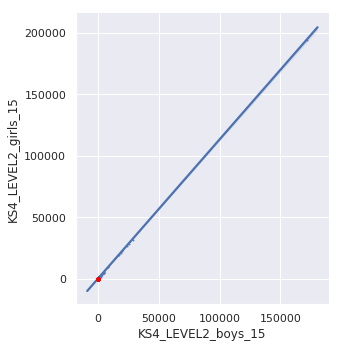

In [84]:
sns.lmplot(x="KS4_LEVEL2_boys_15", y="KS4_LEVEL2_girls_15",
           data = regional_df,
           x_jitter=0.2, y_jitter=0.2, scatter_kws={'s':1}
          );

x = np.linspace(0, 20, 40)

plt.plot(x, m*x + c, '.',  color='red');

Next create a grouped dataset to plot a bar chart showing different attaiment achieved by boys and girls over the various regions

Text(0.5, 1.0, 'Regional KS4 attainmnent of boys and girls')

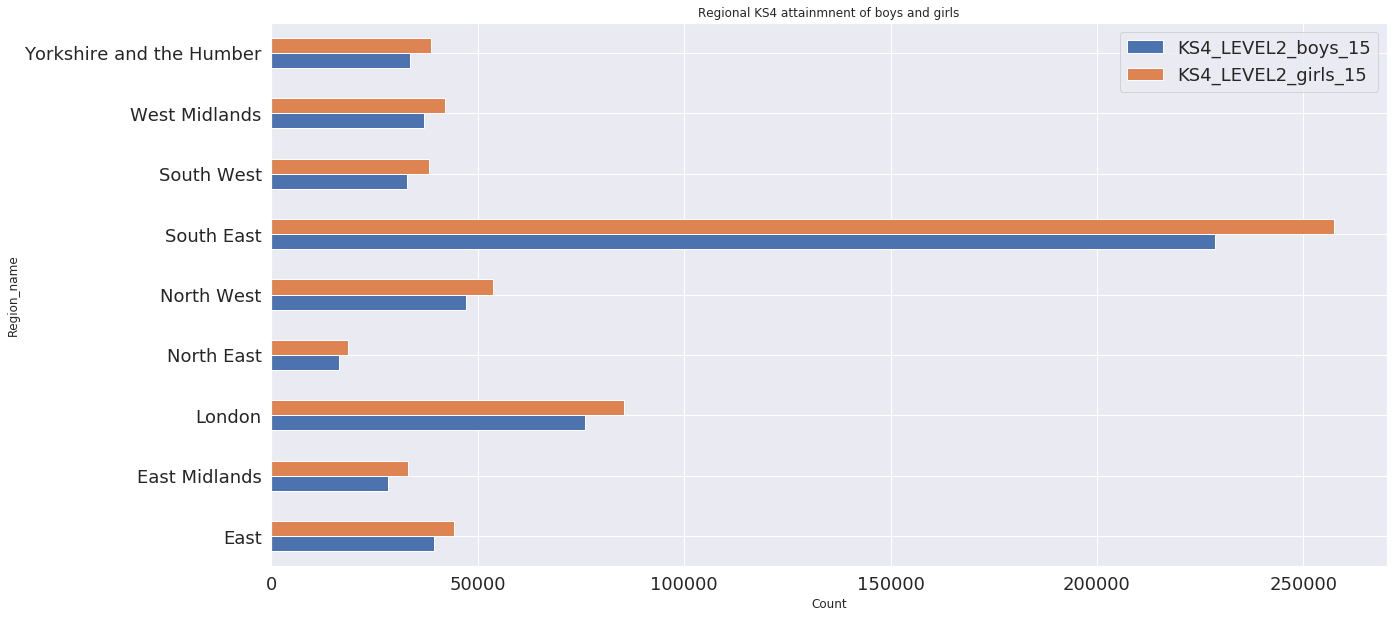

In [85]:
grouped = regional_df.groupby(by = ['Region_name']).sum()
grouped.plot.barh(figsize = (20,10), fontsize = '18')
plt.legend(prop = {'size': 18})
plt.xlabel('Count')
plt.title('Regional KS4 attainmnent of boys and girls')

The barh grapgh shows that girls have higher attainment than boys at KS4 Level 2 accross all the regions, it does show that the south east has a very high attainment level in which the biggest difference in attainment between boys and girls can be seen compared to the other regions. This may be due to an outlier, next I will create a scatter plot to identify how the different regions are clustered 

Text(0.5, 1.0, 'Scatter plot of regional attainment dataset')

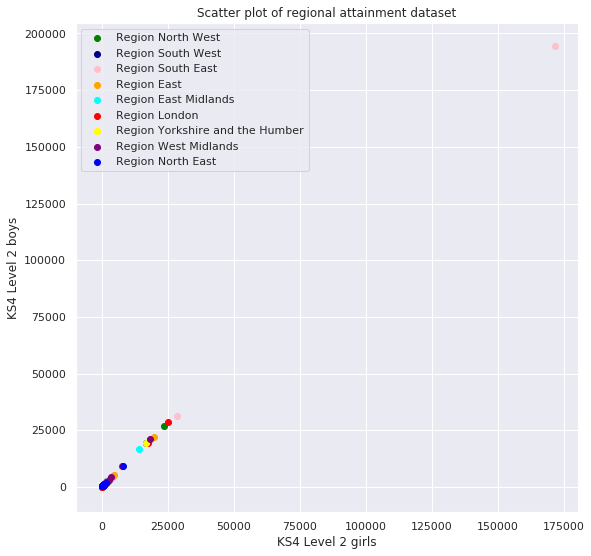

In [86]:
colourMap_dict = {'Unknown': 'black', 'North East': 'blue', 'North West': 'green', 'Yorkshire and the Humber': 'yellow',
                 'East Midlands': 'cyan', 'West Midlands':'purple', 'East': 'orange', 'London': 'red', 'South East': 'pink',
                 'South West': 'Darkblue'}


for region in set(regional_df['Region_name']):
    
    plt.scatter(regional_df['KS4_LEVEL2_boys_15'][regional_df['Region_name']==region],
                regional_df['KS4_LEVEL2_girls_15'][regional_df['Region_name']==region],
                color=colourMap_dict[region], label='Region ' + region
               )

plt.legend()

plt.xlabel('KS4 Level 2 girls')
plt.ylabel('KS4 Level 2 boys')
plt.title('Scatter plot of regional attainment dataset')

The scatter plot indicate some overlapping of the data points so I will create a silhouette column to help plot the silhouette chart to help identify how much overlapping is occuring and help understand what is happening in the condensed scatter plot, it does also show that there is indeed an outlier for the south east region which doesn't seem to fit the data.

Text(0, 0.5, 'Count')

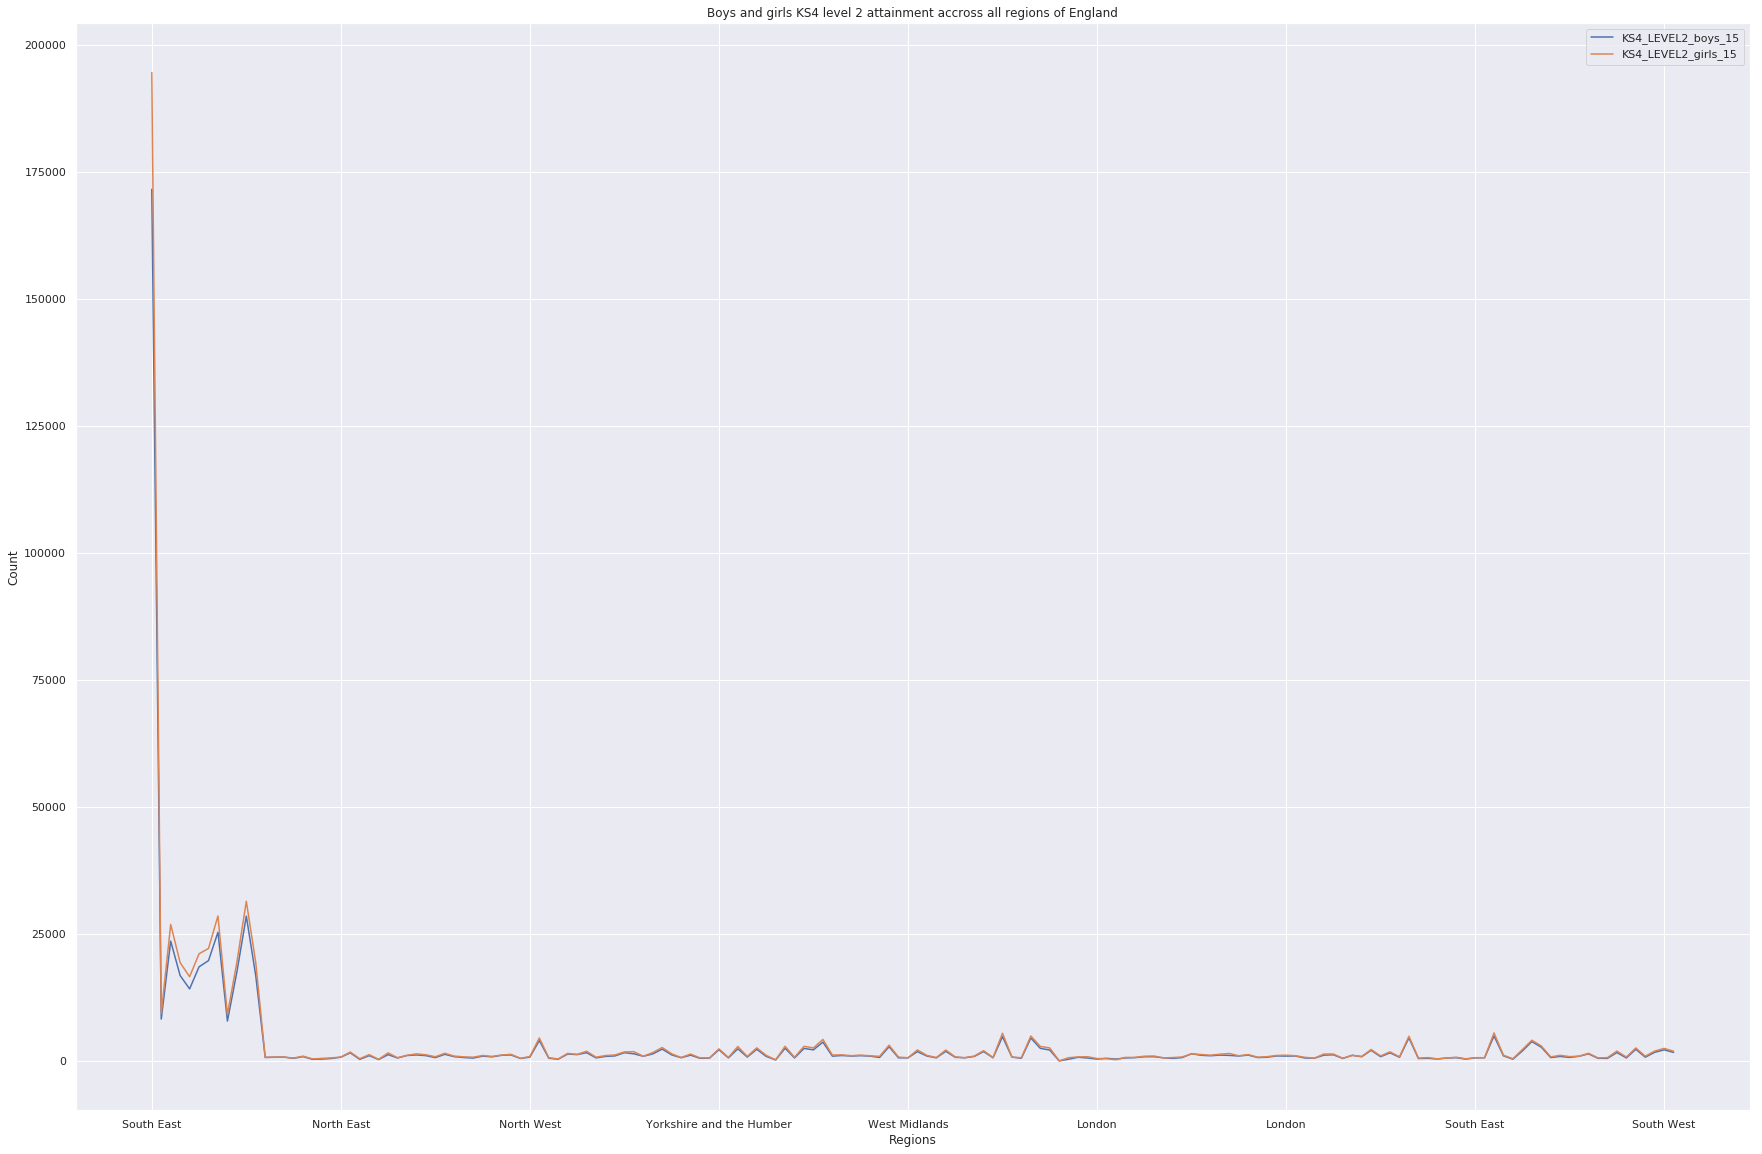

In [87]:
regional_df.plot(x = 'Region_name', y = ['KS4_LEVEL2_boys_15', 'KS4_LEVEL2_girls_15'], figsize =(30,20))
plt.title('Boys and girls KS4 level 2 attainment accross all regions of England')
plt.xlabel('Regions')
plt.ylabel('Count')


# conclusion for data investigation 1

From observing the barh visualisation you can identify that there is a higher KS4 attainment for girls over all the regions, the noticeable difference of attainment between the two groups is not very large except within the South East region where the difference is slightly larger and could be due to the outlier shown in the scatter plot.  It does become apparent from observing the barh that both boys and girls in some regions of England performed much better than in other regions, which indicates that there may be a different variable having an impact on the attainment levels in areas such as the North East region which has extremely low attainment levels for both groups.

# Data investigation 2

# Investigation into Income deprivations impact on KS4 attainment of pupils	

In this investigation I am going to try and identify whether this is any kind of link between income deprivation with the attainment at ks4 level for 15 - 16 pupils, I will use the data held on the level of income deprivation in local areas alongside the educational Key-stage 4 level 2 attainment for all pupils data in local areas.

# Investigate data files

Check the deprivation index file contents

In [95]:
ls! 'data/Deprivation_Index'

ls: cannot access !: No such file or directory
data/Deprivation_Index:
example.csv
File_10_ID2015_Local_Authority_District_Summaries.xlsx
File_11_ID_2015_Upper-tier_Local_Authority_Summaries.xlsx
File_2_ID_2015_Domains_of_deprivation.xlsx
File_3_ID_2015_Supplementary_Indices_-_Income_Deprivation_Affecting_Children_Index_and_Income_Deprivation_Affecting_Older_People_Index.xlsx
File_4_ID_2015_Sub-domains_of_deprivation.xlsx
Lower_Layer_Super_Output_Area__2011__to_Upper_Tier_Local_Authorities__2018__Lookup_in_England_and_Wales_v2.csv


Check the encoding of the example.csv file

In [96]:
chardet.detect(open('data/Deprivation_Index/example.csv', 'rb').read())

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

check the head of the dataset to get a fill for the data

In [97]:
pd.read_csv('data/Deprivation_Index/example.csv').head()

,LSOAcode2011,LSOAname2011,LocalAuthorityDistrictcode2013,LocalAuthorityDistrictname2013,IndexofMultipleDeprivationRank,IndexofMultipleDeprivationDecile,IncomeRank,IncomeDecile,EmploymentRank,EmploymentDecile,EducationSkillsandTrainingRank,EducationSkillsandTrainingDecile,HealthDeprivationandDisabilityRank,HealthDeprivationandDisabilityDecile,CrimeRank,CrimeDecile,BarrierstoHousingandServicesRank,BarrierstoHousingandServicesDecile,LivingEnvironmentRank,LivingEnvironmentDecile
0,E01031349,Adur 001A,E07000223,Adur,"21,352",7,"18,992",6,"19,305",6,"13,727",5,"25,876",8,"12,817",4,"28,166",9,"18,367",6
1,E01031350,Adur 001B,E07000223,Adur,"8,864",3,"9,233",3,"7,879",3,"6,969",3,"6,883",3,"12,781",4,"11,399",4,"16,242",5
2,E01031351,Adur 001C,E07000223,Adur,"22,143",7,"24,539",8,"23,389",8,"10,213",4,"24,693",8,"9,112",3,"24,743",8,"22,299",7
3,E01031352,Adur 001D,E07000223,Adur,"17,252",6,"16,087",5,"13,699",5,"10,468",4,"19,627",6,"16,127",5,"19,559",6,"22,819",7
4,E01031370,Adur 001E,E07000223,Adur,"15,643",5,"17,918",6,"13,322",5,"7,819",3,"14,893",5,"13,723",5,"22,433",7,"18,191",6


In [98]:
list(pd.read_csv('data/Deprivation_Index/example.csv').columns)

['LSOAcode2011',
 'LSOAname2011',
 'LocalAuthorityDistrictcode2013',
 'LocalAuthorityDistrictname2013',
 'IndexofMultipleDeprivationRank',
 'IndexofMultipleDeprivationDecile',
 'IncomeRank',
 'IncomeDecile',
 'EmploymentRank',
 'EmploymentDecile',
 'EducationSkillsandTrainingRank ',
 'EducationSkillsandTrainingDecile',
 'HealthDeprivationandDisabilityRank',
 'HealthDeprivationandDisabilityDecile',
 'CrimeRank',
 'CrimeDecile ',
 'BarrierstoHousingandServicesRank ',
 'BarrierstoHousingandServicesDecile ',
 'LivingEnvironmentRank ',
 'LivingEnvironmentDecile ']

In [99]:
pd.read_csv('data/Deprivation_Index/example.csv')['LocalAuthorityDistrictname2013'].unique()

array(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford',
       'Aylesbury Vale', 'Babergh', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Barrow-in-Furness', 'Basildon',
       'Basingstoke and Deane', 'Bassetlaw',
       'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham',
       'Blaby', 'Blackburn with Darwen', 'Blackpool', 'Bolsover',
       'Bolton', 'Boston', 'Bournemouth', 'Bracknell Forest', 'Bradford',
       'Braintree', 'Breckland', 'Brent', 'Brentwood',
       'Brighton and Hove', 'Bristol, City of', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Burnley', 'Bury',
       'Calderdale', 'Cambridge', 'Camden', 'Cannock Chase', 'Canterbury',
       'Carlisle', 'Castle Point', 'Central Bedfordshire', 'Charnwood',
       'Chelmsford', 'Cheltenham', 'Cherwell', 'Cheshire East',
       'Cheshire West and Chester', 'Chesterfield', 'Chichester',
       'Chiltern', 'Chorley', 'Christchurch', 'City of London',
       'Co

In [100]:
pd.read_csv('data/Deprivation_Index/example.csv').describe()

,IndexofMultipleDeprivationDecile,IncomeDecile,EmploymentDecile,EducationSkillsandTrainingDecile,HealthDeprivationandDisabilityDecile,CrimeDecile,BarrierstoHousingandServicesDecile,LivingEnvironmentDecile
count,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000
mean,5.500122,5.500122,5.500122,5.500122,5.500122,5.500122,5.500122,5.500122
std,2.872325,2.872325,2.872325,2.872325,2.872325,2.872325,2.872325,2.872325
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Create  dataset holding income data from the deprivation index files

create a dataset containing the relevant data from the example.csv dataset

In [101]:
income_df = pd.read_csv('data/Deprivation_Index/example.csv', thousands = ',', usecols = ['LocalAuthorityDistrictname2013', 'IncomeDecile'])
income_df.head()

,LocalAuthorityDistrictname2013,IncomeDecile
0,Adur,6
1,Adur,3
2,Adur,8
3,Adur,5
4,Adur,6


Get a feel for the data through some initial tests

In [102]:
income_df.describe()

,IncomeDecile
count,32844.000000
mean,5.500122
std,2.872325
min,1.000000
25%,3.000000
50%,5.500000
75%,8.000000
max,10.000000


# Check and clean data in the dataset

Check for invalid data types

In [103]:
income_df['IncomeDecile'].unique()

array([ 6,  3,  8,  5, 10,  7,  2,  4,  9,  1])

In [104]:
income_df['LocalAuthorityDistrictname2013'].unique()

array(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford',
       'Aylesbury Vale', 'Babergh', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Barrow-in-Furness', 'Basildon',
       'Basingstoke and Deane', 'Bassetlaw',
       'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham',
       'Blaby', 'Blackburn with Darwen', 'Blackpool', 'Bolsover',
       'Bolton', 'Boston', 'Bournemouth', 'Bracknell Forest', 'Bradford',
       'Braintree', 'Breckland', 'Brent', 'Brentwood',
       'Brighton and Hove', 'Bristol, City of', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Burnley', 'Bury',
       'Calderdale', 'Cambridge', 'Camden', 'Cannock Chase', 'Canterbury',
       'Carlisle', 'Castle Point', 'Central Bedfordshire', 'Charnwood',
       'Chelmsford', 'Cheltenham', 'Cherwell', 'Cheshire East',
       'Cheshire West and Chester', 'Chesterfield', 'Chichester',
       'Chiltern', 'Chorley', 'Christchurch', 'City of London',
       'Co

Check for null/NaN values

In [105]:
income_df[income_df.isnull().any(axis=1)]

,LocalAuthorityDistrictname2013,IncomeDecile


In [106]:
income_df.dtypes

LocalAuthorityDistrictname2013    object
IncomeDecile                       int64
dtype: object

# Create additional dataset holding educational data from the keystage 4 dataset

In [107]:
education_df = pd.read_csv('data/key-stage-4/SFR01_2016_Characteristics_Underlying_Data/SFR01_2016_UD_LA_1.csv', thousands =',', usecols =['LA_name', 'KS4_LEVEL2_all_15'])
education_df.head()

,LA_name,KS4_LEVEL2_all_15
0,NaN,366152
1,NaN,17546
2,NaN,50437
3,NaN,36139
4,NaN,30734


initial statistical check for educational data

In [108]:
education_df.describe()

,KS4_LEVEL2_all_15
count,164.000000
mean,7026.213415
std,29854.171440
min,0.000000
25%,1267.750000
50%,1949.500000
75%,3411.000000
max,366152.000000


# Check dataset data for invalid data and clean data

In [109]:
education_df['KS4_LEVEL2_all_15'].unique()

array([366152,  17546,  50437,  36139,  30734,  39600,  41871,  53843,
        16968,  36875,  59914,  36068,   1383,   1463,   1479,   1049,
         1769,    697,    835,   1066,   1485,   3322,    739,   2259,
          566,   2801,   1193,   2163,   2546,   2239,   1453,   2785,
         1768,   1455,   1278,   1999,   1679,   2241,   2466,    981,
         1610,   8519,   1140,    713,   2825,   2504,   3513,   1313,
         1930,   2143,   3377,   3211,   1824,   3014,   4953,   2576,
         1288,   2467,   1099,   1129,   4554,   1261,   5205,   1628,
         4849,   1978,    383,   5358,   1294,   5310,   4729,   7925,
         2087,   2244,   1970,   2165,   1934,   1561,   5875,   1346,
         1208,   3977,   2037,   1251,   4020,   1490,   1236,   1802,
         3847,   1262,  10206,   1489,   1137,   9405,   5319,   4678,
            0,    959,   1497,   1380,    815,    935,    574,   1267,
         1318,   1726,   1789,   1199,   1145,   1411,   2794,   2341,
      

In [110]:
education_df['LA_name'].unique()

array([nan, 'Gateshead', 'Newcastle upon Tyne', 'North Tyneside',
       'South Tyneside', 'Sunderland', 'Hartlepool', 'Middlesbrough',
       'Redcar and Cleveland', 'Stockton-on-Tees', 'County Durham',
       'Darlington', 'Northumberland', 'Knowsley', 'Liverpool',
       'St. Helens', 'Sefton', 'Wirral', 'Bolton', 'Bury', 'Manchester',
       'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside',
       'Trafford', 'Wigan', 'Halton', 'Warrington', 'Lancashire',
       'Blackburn with Darwen', 'Blackpool', 'Cheshire East',
       'Cheshire West and Chester', 'Cumbria', 'Barnsley', 'Doncaster',
       'Rotherham', 'Sheffield', 'Bradford', 'Calderdale', 'Kirklees',
       'Leeds', 'Wakefield', 'Kingston Upon Hull, City of',
       'East Riding of Yorkshire', 'North East Lincolnshire',
       'North Lincolnshire', 'North Yorkshire', 'York', 'Derbyshire',
       'Derby', 'Leicestershire', 'Leicester', 'Rutland',
       'Nottinghamshire', 'Nottingham', 'Lincolnshire',
       'Northampt

group all NaN valued rows

In [111]:
education_df[education_df.isnull().any(axis =1)]

,LA_name,KS4_LEVEL2_all_15
0,NaN,366152
1,NaN,17546
2,NaN,50437
3,NaN,36139
4,NaN,30734
5,NaN,39600
6,NaN,41871
7,NaN,53843
8,NaN,16968
9,NaN,36875


replace NaN with 'Unknown'

In [112]:
education_df['LA_name'] = education_df['LA_name'].fillna('Unknown')

check if changes have taken place

In [113]:
education_df['LA_name'].unique()

array(['Unknown', 'Gateshead', 'Newcastle upon Tyne', 'North Tyneside',
       'South Tyneside', 'Sunderland', 'Hartlepool', 'Middlesbrough',
       'Redcar and Cleveland', 'Stockton-on-Tees', 'County Durham',
       'Darlington', 'Northumberland', 'Knowsley', 'Liverpool',
       'St. Helens', 'Sefton', 'Wirral', 'Bolton', 'Bury', 'Manchester',
       'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside',
       'Trafford', 'Wigan', 'Halton', 'Warrington', 'Lancashire',
       'Blackburn with Darwen', 'Blackpool', 'Cheshire East',
       'Cheshire West and Chester', 'Cumbria', 'Barnsley', 'Doncaster',
       'Rotherham', 'Sheffield', 'Bradford', 'Calderdale', 'Kirklees',
       'Leeds', 'Wakefield', 'Kingston Upon Hull, City of',
       'East Riding of Yorkshire', 'North East Lincolnshire',
       'North Lincolnshire', 'North Yorkshire', 'York', 'Derbyshire',
       'Derby', 'Leicestershire', 'Leicester', 'Rutland',
       'Nottinghamshire', 'Nottingham', 'Lincolnshire',
       'Nor

In [114]:
education_df.head()

,LA_name,KS4_LEVEL2_all_15
0,Unknown,366152
1,Unknown,17546
2,Unknown,50437
3,Unknown,36139
4,Unknown,30734


In [115]:
education_df.dtypes

LA_name              object
KS4_LEVEL2_all_15     int64
dtype: object

When conducting this investigation i will only be comparing data from local areas which are present in both datasets, any local area or region which is present in one dataset and not present in the second dataset will not be considered useful data and will not be included in the combined dataset 

Next i will identify the local areas which are present in both datasets and then Group the data from each together into a combined dataset containing these areas 

In [116]:
result_df = set(income_df['LocalAuthorityDistrictname2013']) - set(education_df['LA_name'])
result_df

{'Adur',
 'Allerdale',
 'Amber Valley',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barrow-in-Furness',
 'Basildon',
 'Basingstoke and Deane',
 'Bassetlaw',
 'Blaby',
 'Bolsover',
 'Boston',
 'Braintree',
 'Breckland',
 'Brentwood',
 'Broadland',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Cambridge',
 'Cannock Chase',
 'Canterbury',
 'Carlisle',
 'Castle Point',
 'Charnwood',
 'Chelmsford',
 'Cheltenham',
 'Cherwell',
 'Chesterfield',
 'Chichester',
 'Chiltern',
 'Chorley',
 'Christchurch',
 'Colchester',
 'Copeland',
 'Corby',
 'Cotswold',
 'Craven',
 'Crawley',
 'Dacorum',
 'Dartford',
 'Daventry',
 'Derbyshire Dales',
 'Dover',
 'East Cambridgeshire',
 'East Devon',
 'East Dorset',
 'East Hampshire',
 'East Hertfordshire',
 'East Lindsey',
 'East Northamptonshire',
 'East Staffordshire',
 'Eastbourne',
 'Eastleigh',
 'Eden',
 'Elmbridge',
 'Epping Forest',
 'Epsom and Ewell',
 'Erewash',
 'Exeter',
 'Fareham',
 'Fenland',
 'Forest Heath',
 'Fores

In [117]:
result2_df = set(education_df['LA_name']) - set(income_df['LocalAuthorityDistrictname2013'])
result2_df

{'Buckinghamshire',
 'Cambridgeshire',
 'Cumbria',
 'Derbyshire',
 'Devon',
 'Dorset',
 'East Sussex',
 'Essex',
 'Gloucestershire',
 'Hampshire',
 'Herefordshire',
 'Hertfordshire',
 'Kent',
 'Kingston Upon Hull, City of',
 'Lancashire',
 'Leicestershire',
 'Lincolnshire',
 'Norfolk',
 'North Yorkshire',
 'Northamptonshire',
 'Nottinghamshire',
 'Oxfordshire',
 'Somerset',
 'Staffordshire',
 'Suffolk',
 'Surrey',
 'Unknown',
 'Warwickshire',
 'West Sussex',
 'Worcestershire'}

Merge the educational and low income datasets into one combined datasets

In [118]:
combined_df = pd.merge(income_df, education_df, how = 'inner', left_on='LocalAuthorityDistrictname2013', right_on = 'LA_name')
combined_df.head()

,LocalAuthorityDistrictname2013,IncomeDecile,LA_name,KS4_LEVEL2_all_15
0,Barking and Dagenham,2,Barking and Dagenham,1411
1,Barking and Dagenham,1,Barking and Dagenham,1411
2,Barking and Dagenham,5,Barking and Dagenham,1411
3,Barking and Dagenham,1,Barking and Dagenham,1411
4,Barking and Dagenham,5,Barking and Dagenham,1411


In [120]:
combined_df.drop(['LA_name'], inplace = True, axis =1)

In [121]:
combined_df.head()

,LocalAuthorityDistrictname2013,IncomeDecile,KS4_LEVEL2_all_15
0,Barking and Dagenham,2,1411
1,Barking and Dagenham,1,1411
2,Barking and Dagenham,5,1411
3,Barking and Dagenham,1,1411
4,Barking and Dagenham,5,1411


# Statistical tests

Next i will conduct some initial statistical tests over the combined dataset

In [122]:
combined_df.describe()

,IncomeDecile,KS4_LEVEL2_all_15
count,19330.000000,19330.000000
mean,4.859545,2182.622607
std,2.876829,1363.790507
min,1.000000,0.000000
25%,2.000000,1346.000000
50%,5.000000,1934.000000
75%,7.000000,2504.000000
max,10.000000,7925.000000


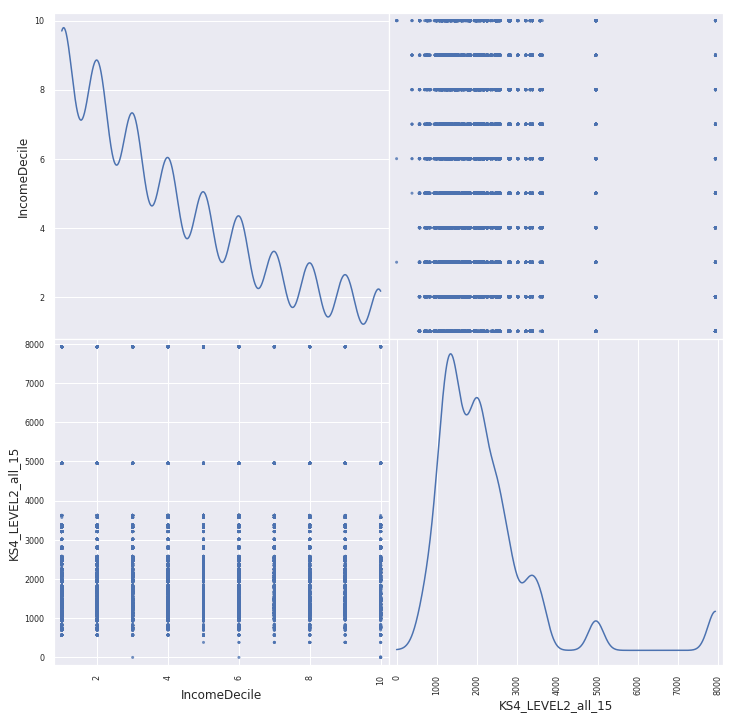

In [123]:
pd.plotting.scatter_matrix(combined_df[['IncomeDecile', 'KS4_LEVEL2_all_15']], alpha = 0.8, figsize = (12,12), diagonal ='kde')
plt.show()

Find the pearson r value for the data

In [127]:
scipy.stats.spearmanr(combined_df['IncomeDecile'], combined_df['KS4_LEVEL2_all_15'])

SpearmanrResult(correlation=-0.0034701279083854467, pvalue=0.6295002575966042)

# Visualisations

Generate data to plot

In [131]:
result_df = combined_df[['IncomeDecile', 'KS4_LEVEL2_all_15']].groupby(by = 'IncomeDecile').sum()
result_df.head()

,KS4_LEVEL2_all_15
IncomeDecile,
1,6911940
2,5539055
3,4712363
4,4394182
5,4068764


Plot data on a bar chart

Text(0.5, 1.0, 'Pupils KS4 attainment accross the income decile ranges')

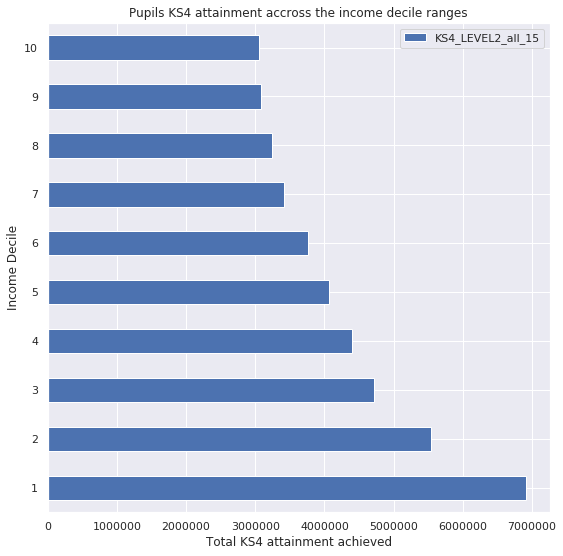

In [135]:
result_df.plot.barh()
plt.ylabel('Income Decile')
plt.xlabel('Total KS4 attainment achieved')
plt.title('Pupils KS4 attainment accross the income decile ranges')

Text(0.5, 1.0, 'KS4 attainment accross all income deciles')

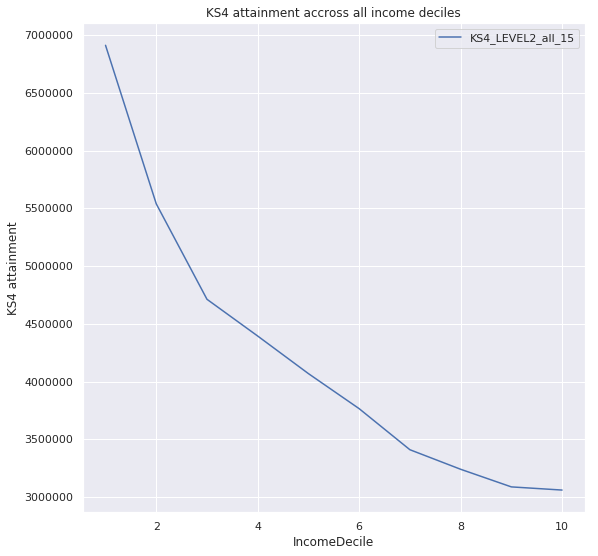

In [136]:
result_df.plot()
plt.ylabel('KS4 attainment')
plt.title('KS4 attainment accross all income deciles')

# Conclusion

During this investigation it has become apparent that the KS4 educational attainment level for children is varied across the different regions of England, it has also highlight that there is a difference in attainment between 16 year old boys and girls. The results of the investigation are however limited by the data used, which has also been collected at different times and collaborated in different ways, to fully understand what impact income deprivation has on children’s educational attainment further data is needed on both variables with larger and  up to date data. This investigation set out to identify if income deprivation had a negative impact on the educational attainment achieved by children and upon studying the initial results from the data used it implies that in fact income deprivation has perhaps had a positive impact upon the attainment levels achieved but the findings does not produced enough grounds to confidently confirm this.